Analisis Univariado del Proyecto Final

In [240]:
# Importo las librerias
import pandas as pd
import numpy as np
from sqlalchemy.engine import URL
from sqlalchemy import create_engine
from seaborn import boxplot
import matplotlib.pyplot as plt


# Info de la base de datos
server = '.\SQLEXPRESS'
database = 'heart2020'

In [241]:
# Info de la conexion
connection_string = 'DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';Trusted_Connection=yes;'

connection_url = URL.create("mssql+pyodbc", query={"odbc_connect": connection_string})

engine = create_engine(connection_url)

cnx = engine.connect()

In [242]:
# Hago un query para obtener los datos y lo guardo en un dataframe
df = pd.read_sql("SELECT * FROM heart2020.dbo.heart_2020", engine)


In [243]:
# Tiro magia a las columnas para que sean floats
df['BMI'] = df['BMI'].astype(float, errors= 'raise')
df['PhysicalHealth'] = df['PhysicalHealth'].astype(float, errors= 'raise')
df['MentalHealth'] = df['MentalHealth'].astype(float, errors= 'raise')
df['SleepTime'] = df['SleepTime'].astype(float, errors= 'raise')

In [244]:
# Revisamos el dataframe
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,28.90,No,No,No,0.0,0.0,No,Female,70-74,White,No,Yes,Very good,7.0,No,No,No
1,Yes,29.16,Yes,No,Yes,0.0,0.0,No,Male,70-74,White,Yes,Yes,Fair,8.0,No,No,No
2,No,23.57,Yes,No,No,0.0,2.0,No,Male,70-74,White,No,Yes,Very good,8.0,No,No,Yes
3,No,29.23,Yes,Yes,No,0.0,3.0,No,Female,40-44,White,No,No,Good,9.0,No,No,No
4,No,27.37,No,No,No,0.0,0.0,No,Female,45-49,White,No,Yes,Excellent,6.0,No,No,No


In [245]:
# Revisamos las dimensiones del dataframe
df.shape

(319795, 18)

In [246]:
# Revisamos los tipos de datos de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [247]:
# Revisamos los tipos de datos de cada columna
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [248]:
# Revisamos las principales caracteristicas estadisticas del dataframe y los damos vuelta
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


Tenemos 18 variables y 319.795 observaciones

Para los graficos voy a utilizar la variable SleepTime.
Voy a analizar los datos para ver el conjunto de la población estudiada en que punto se concentra

In [249]:
# Veamos los datos estadisticas de SleepTime
df.SleepTime.describe()

count    319795.000000
mean          7.097075
std           1.436007
min           1.000000
25%           6.000000
50%           7.000000
75%           8.000000
max          24.000000
Name: SleepTime, dtype: float64

In [250]:
# Creamos un df para SleepTime para que sea mas facil de trabajar
df_SleepTime = df[['SleepTime']]
df_SleepTime.head()

,SleepTime
0,7.0
1,8.0
2,8.0
3,9.0
4,6.0


<AxesSubplot:xlabel='SleepTime'>

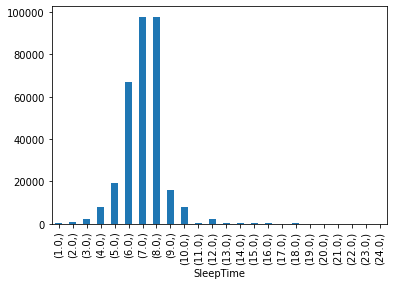

In [251]:
# Creamos el grafico de barras ordenado por BMI
df_SleepTime.value_counts().sort_index().plot.bar()

In [252]:
# Creo un nuevo df seleccionando solamente el top 6 de SleepTime

df_SleepTime_total = pd.DataFrame(df["SleepTime"].value_counts().reset_index())
df_SleepTime_top6 = df_SleepTime_total[:5].copy()
df_SleepTime_top6


,index,SleepTime
0,7.0,97751
1,8.0,97602
2,6.0,66721
3,5.0,19184
4,9.0,16041


In [253]:
df_SleepTime_total

,index,SleepTime
0,7.0,97751
1,8.0,97602
2,6.0,66721
3,5.0,19184
4,9.0,16041
5,10.0,7796
6,4.0,7750
7,12.0,2205
8,3.0,1992
9,2.0,788


In [254]:
df_SleepTime_top6.loc['Otros'] = df_SleepTime_total['SleepTime'][:6].sum()

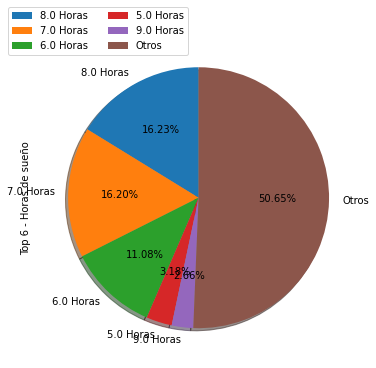

In [255]:
fig, ax = plt.subplots(figsize=(10,6))
df_SleepTime_top6.plot(kind = 'pie', 
             y = 'SleepTime', 
             autopct='%1.2f%%', 
             ax = ax, 
             label="Top 6 - Horas de sueño", 
             labels = labels, 
             startangle=90, 
             shadow = True)

plt.legend(loc='upper left', bbox_to_anchor=(-0.1, 1.1), ncol=2)

<AxesSubplot:xlabel='SleepTime'>

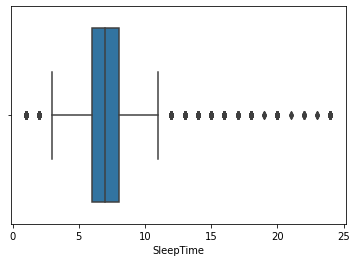

In [256]:
# Creamos grafico de cajas o boxplot
sns.boxplot(x='SleepTime', data=df)

# Se observa que la cantidad de horas de sueño van de 6 a 8 horas y representan el 75% de los datos

In [257]:
# Creamos un dataframe nuevo para sleeptime para calcular la Frecuencia absoluta y Acumulada

In [258]:
frec_df = pd.DataFrame(df['SleepTime'].value_counts().sort_index())
frec_df.columns = ['Frecuencia Absoluta']
frec_df.head()

,Frecuencia Absoluta
1.0,551
2.0,788
3.0,1992
4.0,7750
5.0,19184


In [259]:
# Calculo frecuencia absoluta
val = frec_df['Frecuencia Absoluta'].values
acum = []
valor = 0
# Calculo acumulado
for x in val:
    valor = valor + x
    acum.append(valor)

frec_df["Frec_Abs_Acu"]= acum
frec_df.head()

,Frecuencia Absoluta,Frec_Abs_Acu
1.0,551,551
2.0,788,1339
3.0,1992,3331
4.0,7750,11081
5.0,19184,30265


In [264]:
# Agrego frecuencia relativa
frec_df["Frec_Rel"] = 100 * frec_df["Frecuencia Absoluta"] / len(df.SleepTime)
frec_df

,Frecuencia Absoluta,Frec_Abs_Acu,Frec_Rel
1.0,551,551,0.172298
2.0,788,1339,0.246408
3.0,1992,3331,0.622899
4.0,7750,11081,2.423428
5.0,19184,30265,5.998843
6.0,66721,96986,20.863678
7.0,97751,194737,30.566769
8.0,97602,292339,30.520177
9.0,16041,308380,5.016026
10.0,7796,316176,2.437812


In [265]:
# Agregamos frecuencia relativa acumulada
valores2 = frec_df['Frec_Rel'].values
acum2 = []
valor2 = 0
for x in valores2:
    valor2 = valor2 + x
    acum2.append(valor2)
frec_df["Frec_Rel_Acu"] = acum2

In [266]:
# Vemos la tabla completa
frec_df

,Frecuencia Absoluta,Frec_Abs_Acu,Frec_Rel,Frec_Rel_Acu
1.0,551,551,0.172298,0.172298
2.0,788,1339,0.246408,0.418706
3.0,1992,3331,0.622899,1.041605
4.0,7750,11081,2.423428,3.465032
5.0,19184,30265,5.998843,9.463875
6.0,66721,96986,20.863678,30.327554
7.0,97751,194737,30.566769,60.894323
8.0,97602,292339,30.520177,91.414500
9.0,16041,308380,5.016026,96.430526
10.0,7796,316176,2.437812,98.868338
